# Import Libraries

In [44]:
import pandas as pd
import kagglehub

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing task
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#Encode Label
from sklearn.preprocessing import LabelEncoder
#Train-test split
from sklearn.model_selection import train_test_split
#Train model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package punkt to C:\Users\Dini
[nltk_data]     Qaribullah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Dini
[nltk_data]     Qaribullah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dini
[nltk_data]     Qaribullah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Download latest version
path = kagglehub.dataset_download("clovisdalmolinvieira/news-sentiment-analysis")

print("Path to dataset files:", path)

100%|██████████| 655k/655k [00:01<00:00, 634kB/s]

Extracting files...
Path to dataset files: C:\Users\Dini Qaribullah\.cache\kagglehub\datasets\clovisdalmolinvieira\news-sentiment-analysis\versions\1


# Load Data

In [5]:
df = pd.read_csv('news_sentiment_analysis.csv')
df

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business
...,...,...,...,...,...,...,...,...
3495,etfdailynews,MarketBeat News,"Arrow Electronics, Inc. (NYSE:ARW) Shares Purc...",QRG Capital Management Inc. increased its stak...,https://www.etfdailynews.com/2024/07/18/arrow-...,2024-07-18T14:36:45+00:00,positive,Technology
3496,etfdailynews,MarketBeat News,"3,120 Shares in NICE Ltd. (NASDAQ:NICE) Bought...",QRG Capital Management Inc. bought a new posit...,https://www.etfdailynews.com/2024/07/18/3120-s...,2024-07-18T14:36:44+00:00,positive,Technology
3497,etfdailynews,MarketBeat News,"QRG Capital Management Inc. Has $857,000 Stock...",QRG Capital Management Inc. boosted its stake ...,https://www.etfdailynews.com/2024/07/18/qrg-ca...,2024-07-18T14:36:43+00:00,positive,Technology
3498,finanznachrichten,NaN,Biotechnology Market: Surging Investments and ...,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",https://www.finanznachrichten.de/nachrichten-2...,2024-07-18T14:36:00+00:00,neutral,Technology


In [8]:
df[df['Author'] == 'Bridger Palmer']

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business


In [9]:
df['Sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

# Quick EDA

In [18]:
a = df['Sentiment'].value_counts().sort_values(ascending=False)
a

Sentiment
positive    2134
neutral      789
negative     577
Name: count, dtype: int64

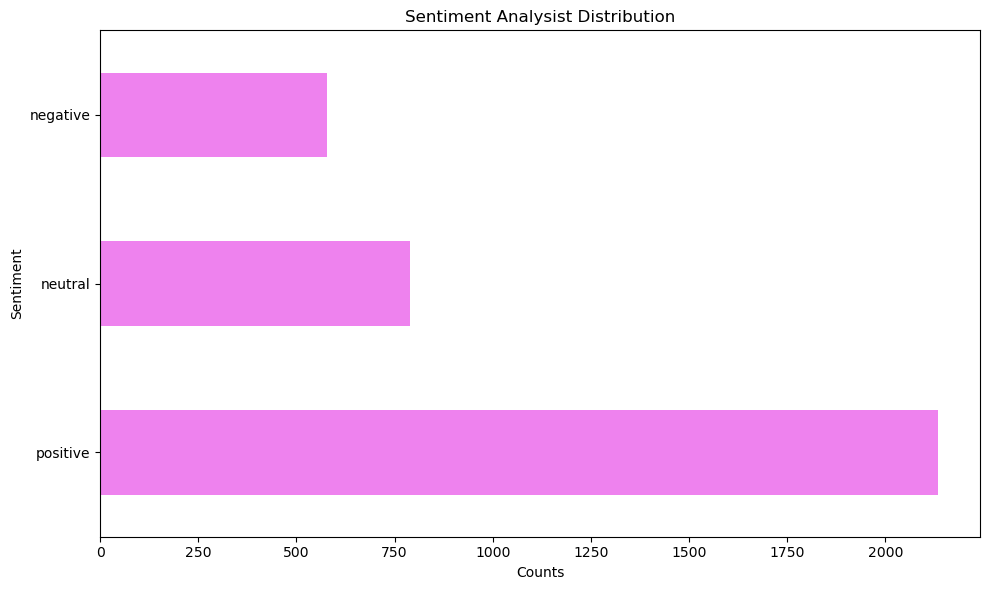

In [21]:
plt.figure(figsize=(10,6))
a.plot(kind='barh', color='violet')
plt.title('Sentiment Analysist Distribution')
plt.xlabel('Counts')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.show()

# Preprocessing Task

Preprocessing Task aims to clean text data to easier to be processed by model including lower casing, remove punctuation, tokenization, remove stopwords, steaming and lemmatization, and rejoin words

In [36]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuations = string.punctuation

def preprocess(text):
    text = text.lower() #lowercasting
    text = text.translate(str.maketrans('','', punctuations)) #remove punctuations
    tokens = word_tokenize(text) #tokenizing
    tokens = [t for t in tokens if t not in stop_words] #remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens] #lemmatization
    return ' '.join(tokens)

df['clean_description'] = df['Description'].apply(preprocess)
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type,clean_description
0,stgnews,bridger palmer,pine view high teacher wins best in state awar...,"st. george — kaitlyn larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business,st george — kaitlyn larson firstyear teacher p...
1,Zimbabwe Mail,staff reporter,businesses face financial strain amid liquidit...,"harare, zimbabwe – local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business,harare zimbabwe – local business grappling sev...
2,4-traders,,musk donates to super pac working to elect tru...,(marketscreener.com) billionaire elon musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business,marketscreenercom billionaire elon musk donate...
3,4-traders,,us ftc issues warning to franchisors over unfa...,(marketscreener.com) a u.s. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business,marketscreenercom u trade regulator fridayanno...
4,PLANET,,rooftop solar's dark side,4.5 million households in the u.s. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business,45 million household u solar panel home custom...


# TF - IDF Vectonizer

TF - IDF Vectonizer aims to transform text into numeric.
* TF (Term Frequency): How often a word appears in a document
* IDF (Inverse Document Frequency): How rarely a word appears in a document (the more rare, the more important)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_description'])

<3500x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 80059 stored elements in Compressed Sparse Row format>

# Encode Label

This step aims to transform label into numeric so the data can be learned by the model

In [39]:
le = LabelEncoder()
y = le.fit_transform(df['Sentiment'])

# Train-Test Split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)
print(f'x_train: ', x_train.shape)
print(f'x_test: ', x_test.shape)

x_train:  (2800, 5000)
x_test:  (700, 5000)


# Train Model

In [51]:
models_nb = MultinomialNB()
models_lr = LogisticRegression(max_iter=1000)
models_rf = RandomForestClassifier(n_estimators=100, random_state=40)
models_svc = LinearSVC()

models ={
    'Naive Bayes': models_nb,
    'Logistic Regression': models_lr,
    'Random Forest': models_rf,
    'SVC': models_svc
}

results ={}

for name, model in models.items:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

TypeError: 'builtin_function_or_method' object is not iterable

# Model Evaluation

# Save Model

# Inference